## 实现逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X = X[y<2, :2]
y = y[y<2]

In [4]:
X.shape

(100, 2)

In [5]:
y.shape

(100,)

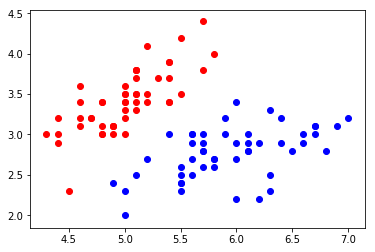

In [6]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

### 使用逻辑回归

In [7]:
%run ../playML/model_selection.py

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [9]:
%run ../playML/LogisticRegression.py

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [11]:
log_reg.score(X_test, y_test)

1.0

In [12]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.17601199, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [13]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [14]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [16]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [17]:
log_reg.interception_

-0.6937719272911224

In [19]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

In [20]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

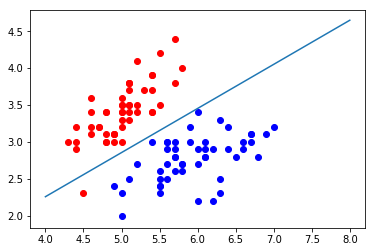

In [21]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.plot(x1_plot, x2_plot)
plt.show()

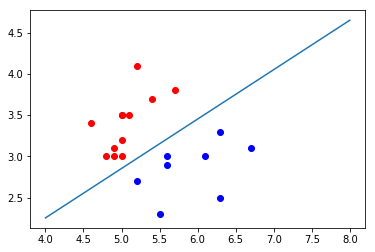

In [22]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color='red')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color='blue')
plt.plot(x1_plot, x2_plot)
plt.show()

In [34]:
def plot_decision_boundary(model, axis):
    # 这后面少些代码。。。
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape,
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape 
    )
    

    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [35]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

TypeError: unsupported operand type(s) for *: 'builtin_function_or_method' and 'float'

### kNN的决策边界

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
knn_clf.score(X_test, y_test)

1.0

In [40]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'